## Sequential Agent

In [2]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [8]:
class AgentState(TypedDict):
    name: str
    age:int
    final:str

In [4]:
def first_node(state:AgentState)->AgentState:
    """This is the first node of our sequence"""

    state["final"]= f"Hi {state['name']}!"
    return state

def second_node(state:AgentState)->AgentState:
    """This is the second node of our sequence"""
    state["final"]= state["final"] + f" You are {state['age']} years old."
    return state

In [6]:
graph = StateGraph(AgentState)

graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app=graph.compile()

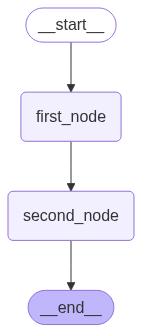

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result=app.invoke({"name": "Ayberk", "age":24})
print(result)

{'name': 'Ayberk', 'age': 24, 'final': 'Hi Ayberk! You are 24 years old.'}


In [11]:
print(result["final"])

Hi Ayberk! You are 24 years old.


### Exercise

In [23]:
class AgentX(TypedDict):
    name: str
    age: int
    skills: list
    final: str

def first_node(state:AgentX)->AgentX:
    state["final"]= f" {state['name']} welcome to the sytsem!"
    return state

def second_node(state:AgentX)->AgentX:
    state["final"]=  state["final"] + f"You are {state['age']} years old!"
    return state
def third_node(state:AgentX)->AgentX:
    state["final"]= state["final"] +  f"You have skills in : {', '.join(state["skills"])}"
    return state


In [24]:
graph = StateGraph(AgentX)
graph.add_node("personalized",first_node)
graph.add_node("ages",second_node)
graph.add_node("skillss",third_node)

graph.set_entry_point("personalized")
graph.add_edge("personalized", "ages")
graph.add_edge("ages", "skillss")
graph.set_finish_point("skillss")

app=graph.compile()

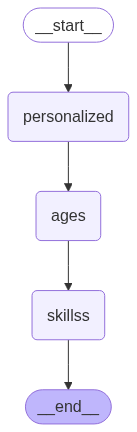

In [25]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
result = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})
print(result["final"])

 Linda welcome to the sytsem!You are 31 years old!You have skills in : Python, Machine Learning, LangGraph
